In [1]:
import random 
import matplotlib.pyplot as plt
import seaborn
import pandas
import numpy

inspired by http://pi3.sites.sheffield.ac.uk/tutorials/week-9

I'm going to flip a coin a certain number of times. That trial yields a some number of head (and some number of tails)

If I repeat the trials many times, what is the outcome?

In [2]:
number_of_coin_tosses_per_trial = 1000    # number of coin tosses in each trial

number_of_trials = 1000    # number of trials

Let 0=tails; 1=heads

To count the number of heads in a single trial, I flip a coin many times

In [3]:
number_of_heads=0
for this_flip_indx in range(number_of_coin_tosses_per_trial):
    coin_result = random.randint(0,1)
    number_of_heads+=coin_result

Aside: A more concise version of that trial loop is to use a list comprehension.

Syntax: 

`[ expression for item in list if conditional ]`

Example:

In [4]:
['abc' for indx in range(3)]

['abc', 'abc', 'abc']

Rewrite the for loop as a list comprehension

In [5]:
number_of_heads = sum([random.randint(0,1) for this_flip_indx in range(number_of_coin_tosses_per_trial)])

We did the experiment (a single trial) in one line of Python

The intention is to run many trials of the same experiment. 

We could use a loop

In [6]:
list_of_trial_results = []
for trial_indx in range(number_of_trials):
    number_of_heads = sum([random.randint(0,1) for this_flip_indx in range(number_of_coin_tosses_per_trial)])
    list_of_trial_results.append(number_of_heads)

Or we could use nested list comprehensions

In [7]:
list_of_trial_results = [sum([random.randint(0,1) for this_flip_indx in range(number_of_coin_tosses_per_trial)]) 
          for trial_indx in range(number_of_trials)]

In [8]:
print(len(list_of_trial_results))

1000


Each element in the list_of_trial_results is the count of how many times "heads" appeared

In [9]:
list_of_trial_results[0:10]

[482, 483, 542, 506, 511, 519, 520, 493, 517, 497]

What is the distribution of that set of outcomes?

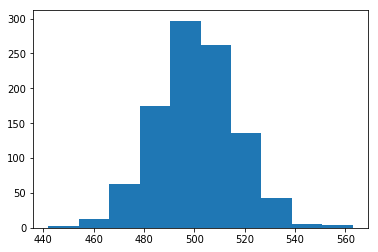

In [10]:
_=plt.hist(list_of_trial_results)

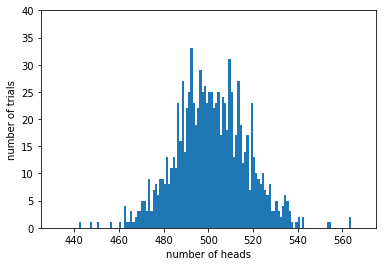

In [11]:
plt.xlabel('number of heads')
plt.ylabel('number of trials')
plt.axis([425, 575, 0, 40])
#plt.grid(True)
_=plt.hist(list_of_trial_results,bins=range(number_of_coin_tosses_per_trial))
plt.show()

Alternative library: Seaborn

Seaborn is a Python data visualization library based on matplotlib.

https://seaborn.pydata.org/

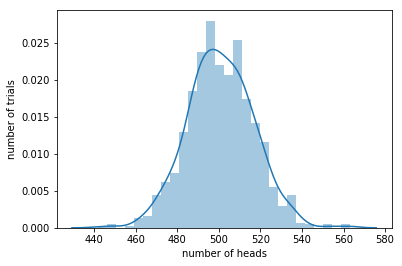

In [12]:
ax=seaborn.distplot(list_of_trial_results)

_=ax.set(xlabel='number of heads', ylabel='number of trials')
plt.savefig('seaborn_binomial')

In [13]:
# error bars

In [14]:
count_heads=0
num_flips=50
for indx in range(num_flips):
    coin = random.randint(1, 2) # random coin flip results in 1 or 2
    count_heads += coin-1

In [15]:
df = pandas.DataFrame([{'head count':count_heads,'tail count':num_flips-count_heads}])
df

,head count,tail count
0,21,29


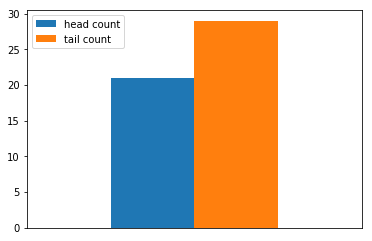

In [16]:
_=df.plot.bar()
_=plt.xticks([])

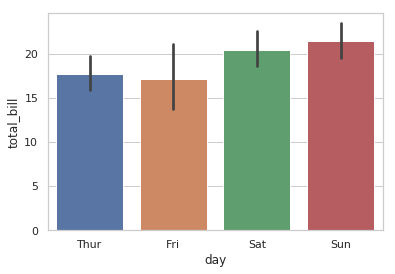

In [17]:
#https://seaborn.pydata.org/generated/seaborn.barplot.html
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)